In [99]:
import numpy as np
import pandas as pd
from functools import reduce
import pathlib
import matplotlib.pyplot as plt
import gzip
import scipy.sparse as sparse
import pickle

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [169]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 3.5  # inches
fig_dpi = 300

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,
    
    # Fonts
    'font.size': 10,
    
    # Axes
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'axes.linewidth': 0.5,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'grid.color': 'gray',
    
    # Legend
    'legend.fontsize': 8,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,
    
    # Lines
   'lines.linewidth': 1.0, # set the default linewidth for plot lines to 1.0 points
   'lines.markersize': 6, # set the default marker size for plot markers to 6 points
    
    'axes.labelsize': 10, # set the font size of the axis labels to 10 points
    'axes.titlesize': 12, # set the font size of the plot title to 12 points
    'xtick.labelsize': 8, # set the font size of the x-axis tick labels to 8 points
    'ytick.labelsize': 8, # set the font size of the y-axis tick labels to 8 points
})

In [102]:
results_etas = pathlib.Path("/export/usuarios_ml4ds/lbartolome/gFedNTM/experiments_centralized/eta_variable/results.pickle")

In [103]:
with open(results_etas, 'rb') as f:
    df_etas = pickle.load(f)

In [104]:
df_etas

,centralized_betas_mean,centralized_betas_std,centralized_thetas_mean,centralized_thetas_std,non_colab_betas_mean,non_colab_betas_std,non_colab_thetas_mean,non_colab_thetas_std,baseline_betas_mean,baseline_betas_std,baseline_thetas_mean,baseline_thetas_std
Eta,,,,,,,,,,,,
0.01,8.648864,0.035464,2563.467322,49.953457,7.528467,0.068876,3069.607601,13.936603,3.623451,0.047171,836.901754,2.642125
0.02,12.223176,0.015096,2536.387189,30.942425,11.687680,0.022822,3022.603434,14.191114,4.676276,0.049128,837.051177,1.472098
0.03,14.758082,0.014301,2471.548433,13.162912,14.520914,0.021502,3004.663009,14.956873,5.927261,0.029735,835.509481,3.069460
0.04,16.826733,0.052789,2431.219036,24.648422,16.723913,0.056193,3028.449505,8.511826,7.177536,0.041544,837.821192,1.653477
0.08,22.667388,0.034978,2406.297419,48.406631,22.662084,0.035152,3005.287444,19.436892,11.620154,0.021201,831.966334,3.236585
1.00,44.312014,0.016840,2866.577898,196.607282,44.312014,0.016840,3368.867048,75.738845,39.672623,0.004159,837.734277,1.684162


In [105]:
df_etas.columns

Index(['centralized_betas_mean', 'centralized_betas_std',
       'centralized_thetas_mean', 'centralized_thetas_std',
       'non_colab_betas_mean', 'non_colab_betas_std', 'non_colab_thetas_mean',
       'non_colab_thetas_std', 'baseline_betas_mean', 'baseline_betas_std',
       'baseline_thetas_mean', 'baseline_thetas_std'],
      dtype='object')

In [106]:
# select the mean columns for betas and the corresponding std columns
betas_means = df_etas.filter(regex='betas_mean')
betas_stds = df_etas.filter(regex='betas_std')

# select the mean columns for thetas and the corresponding std columns
thetas_means = df_etas.filter(regex='thetas_mean')[['centralized_thetas_mean','non_colab_thetas_mean']]
thetas_stds = df_etas.filter(regex='thetas_std')[['centralized_thetas_std','non_colab_thetas_std']]

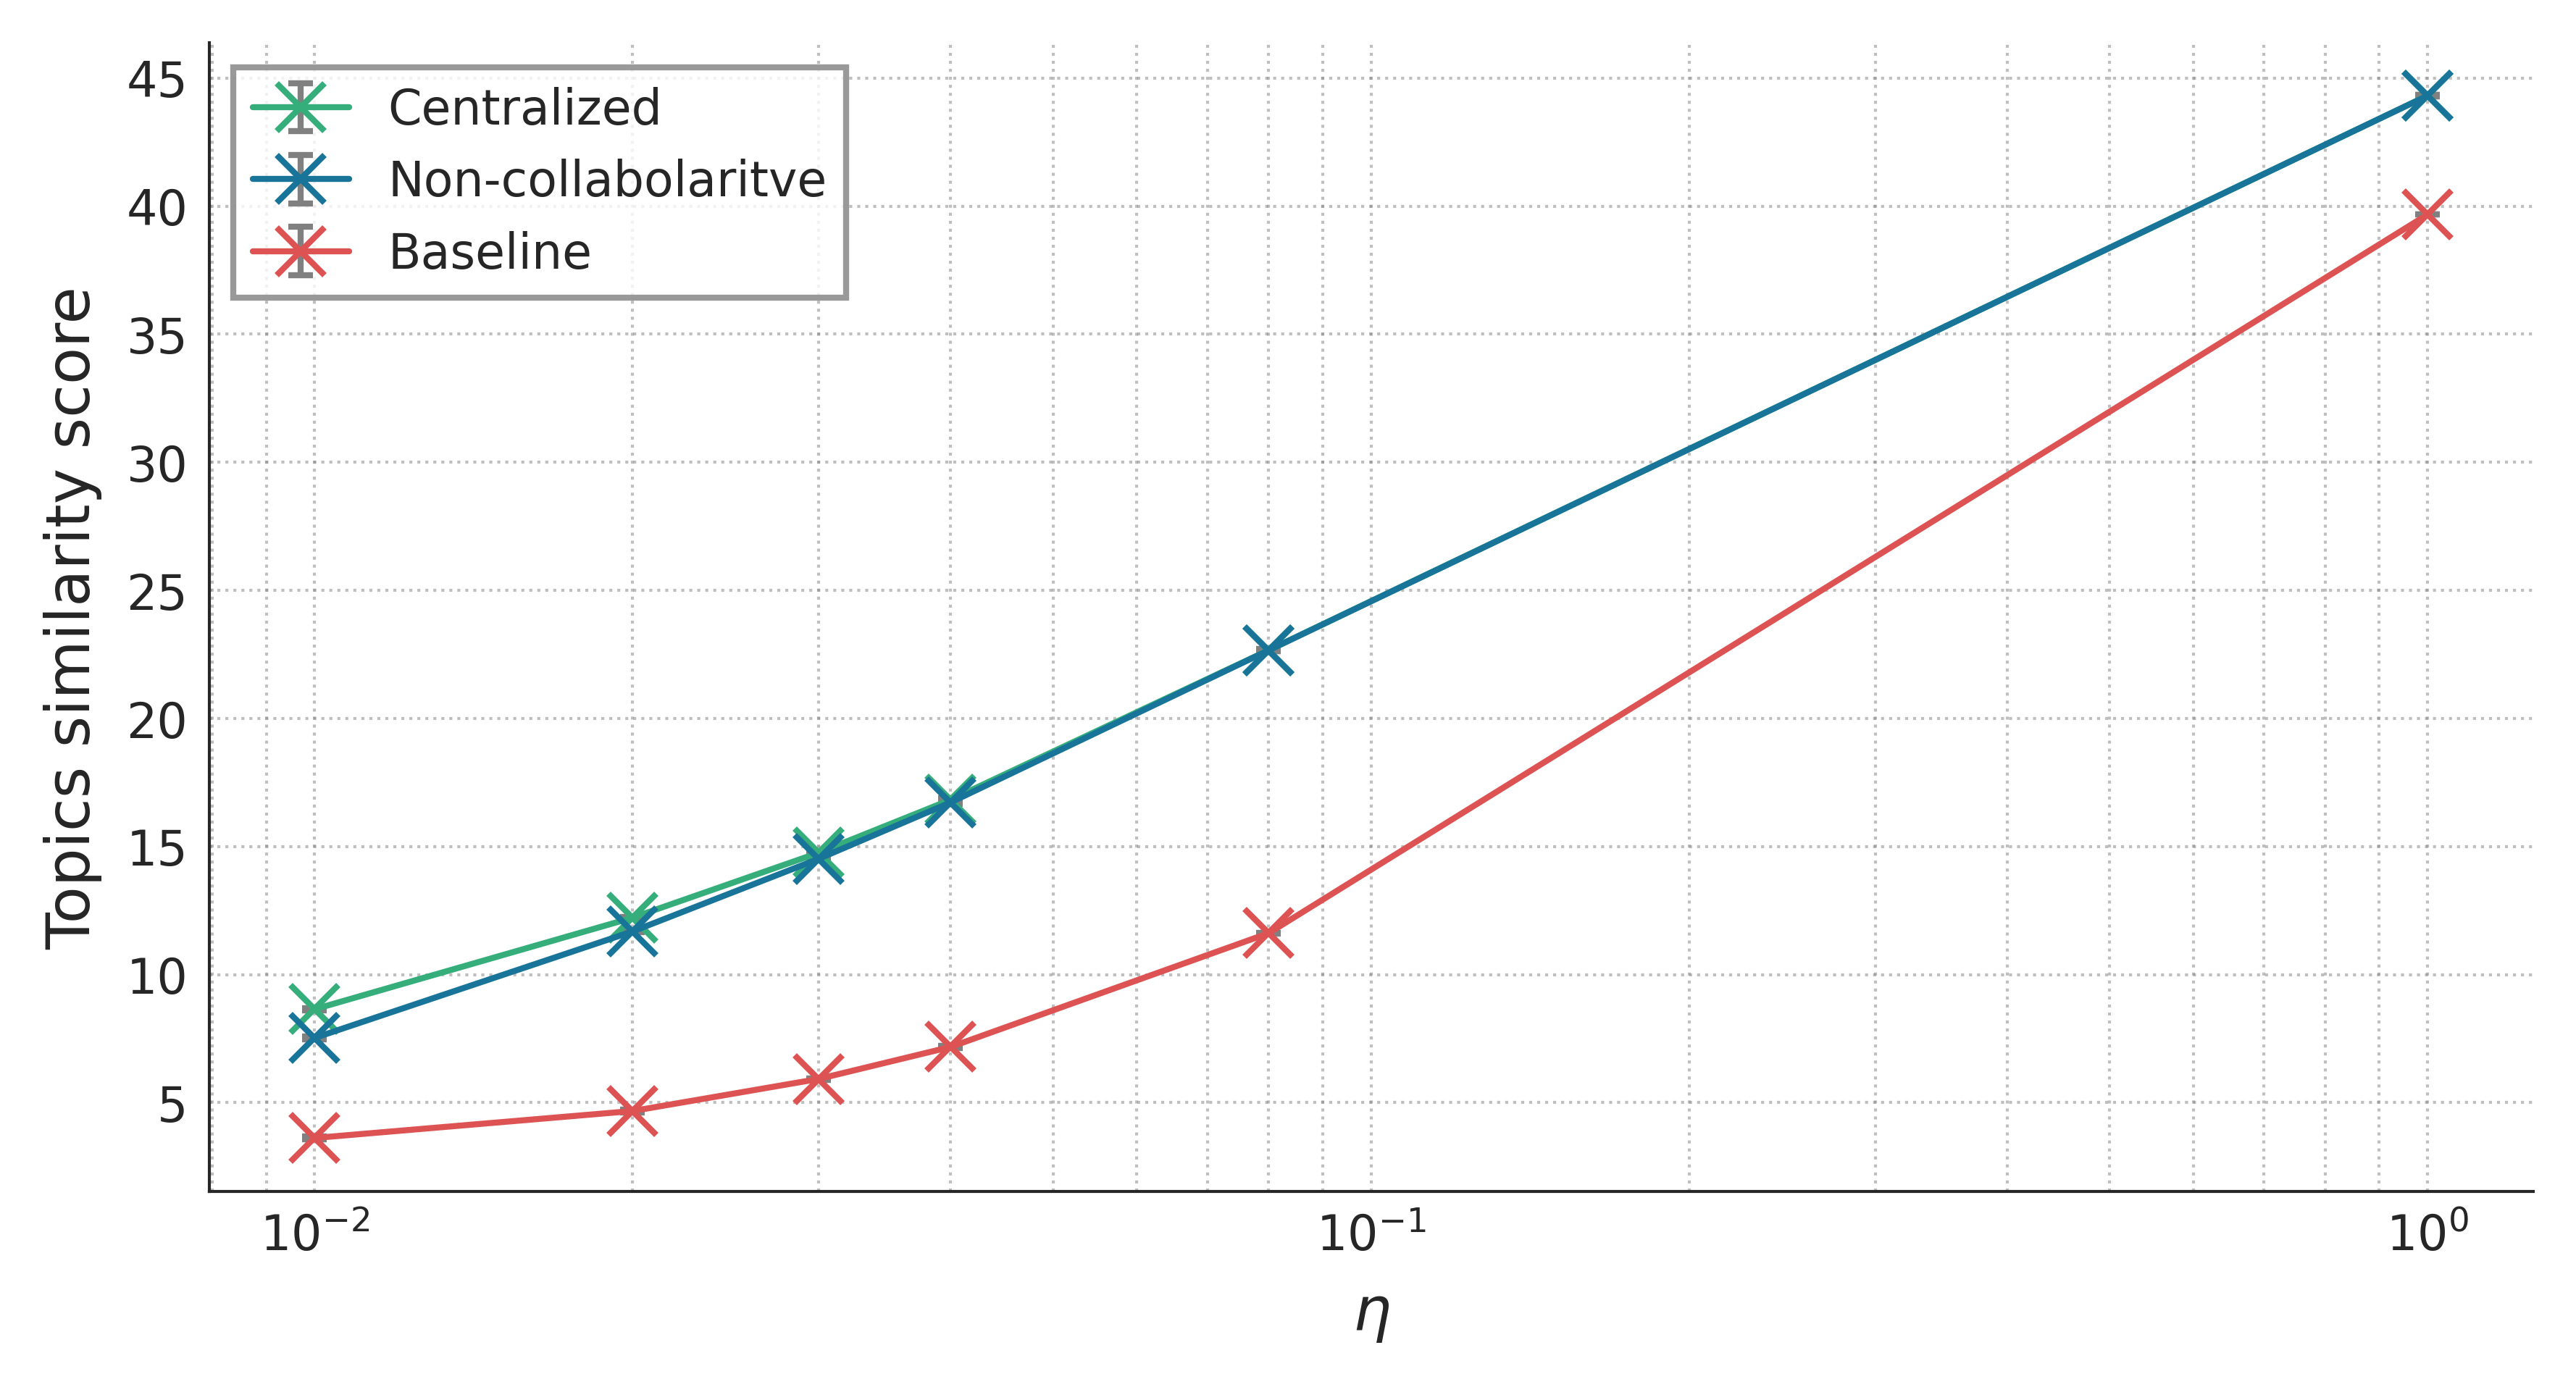

In [124]:
# plot the betas means and their variances
fig, ax1 = plt.subplots()
labels = ["Centralized", "Non-collabolaritve", "Baseline"]
colors = ["#36AE7C", "#187498", "#DD5353"]
for col_i in range(len(betas_means.columns)):
    ax1.errorbar(betas_means.index,
                 betas_means[betas_means.columns[col_i]],
                 yerr=betas_stds[betas_stds.columns[col_i]],
                 fmt='x-',
                 label=labels[col_i],
                 color=colors[col_i],
                 ecolor='gray',
                 capsize=2)
ax1.set_xscale('log') # set the x-axis to logarithmic scale
ax1.set_xlabel(r'$\eta$')
ax1.set_ylabel('Topics similarity score')
#ax1.set_title('Betas Means and Variances')
ax1.legend()
ax1.grid(True) # add a grid
plt.show()

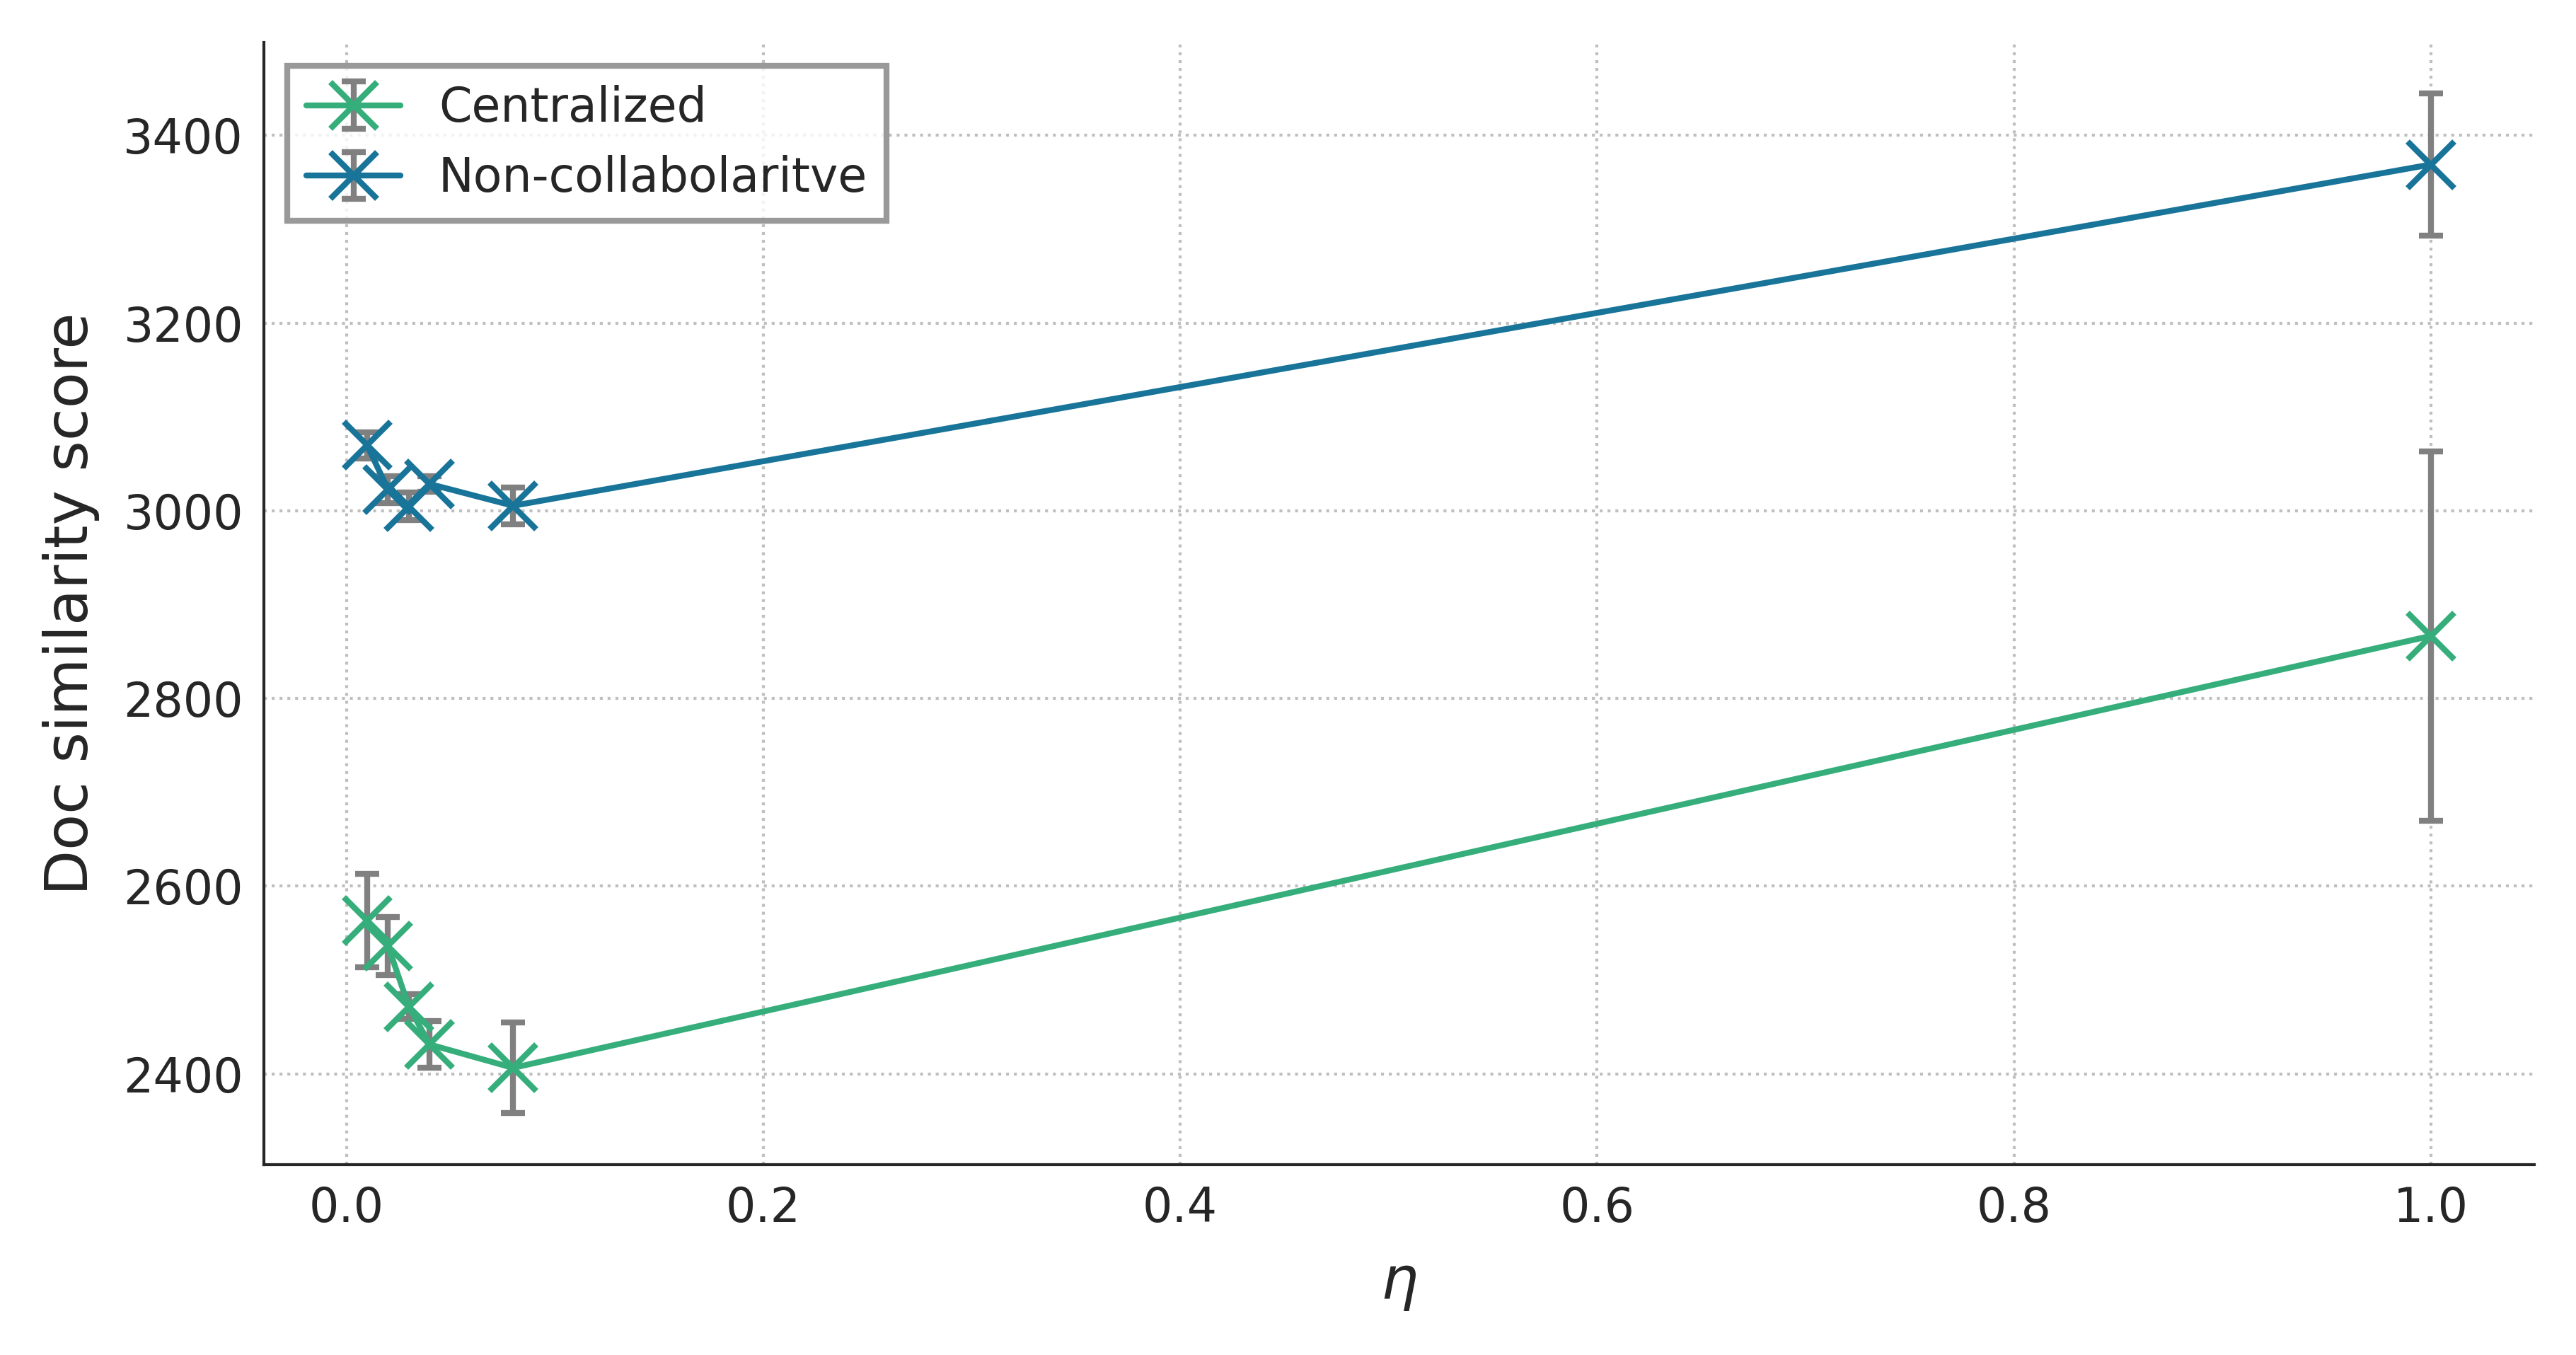

In [125]:
# plot the thetas means and their variances
fig, ax2 = plt.subplots()
for col_i in range(len(thetas_means.columns)):
    ax2.errorbar(thetas_means.index,
                 thetas_means[thetas_means.columns[col_i]],
                 yerr=thetas_stds[thetas_stds.columns[col_i]],
                 fmt='x-',
                 label=labels[col_i],
                 color=colors[col_i],
                 ecolor='gray',
                 capsize=2)
ax2.set_xlabel(r'$\eta$')
ax2.set_ylabel('Doc similarity score')
#ax2.set_title('Thetas Means and Variances')
ax2.legend()
ax2.grid(True) # add a grid
plt.show()

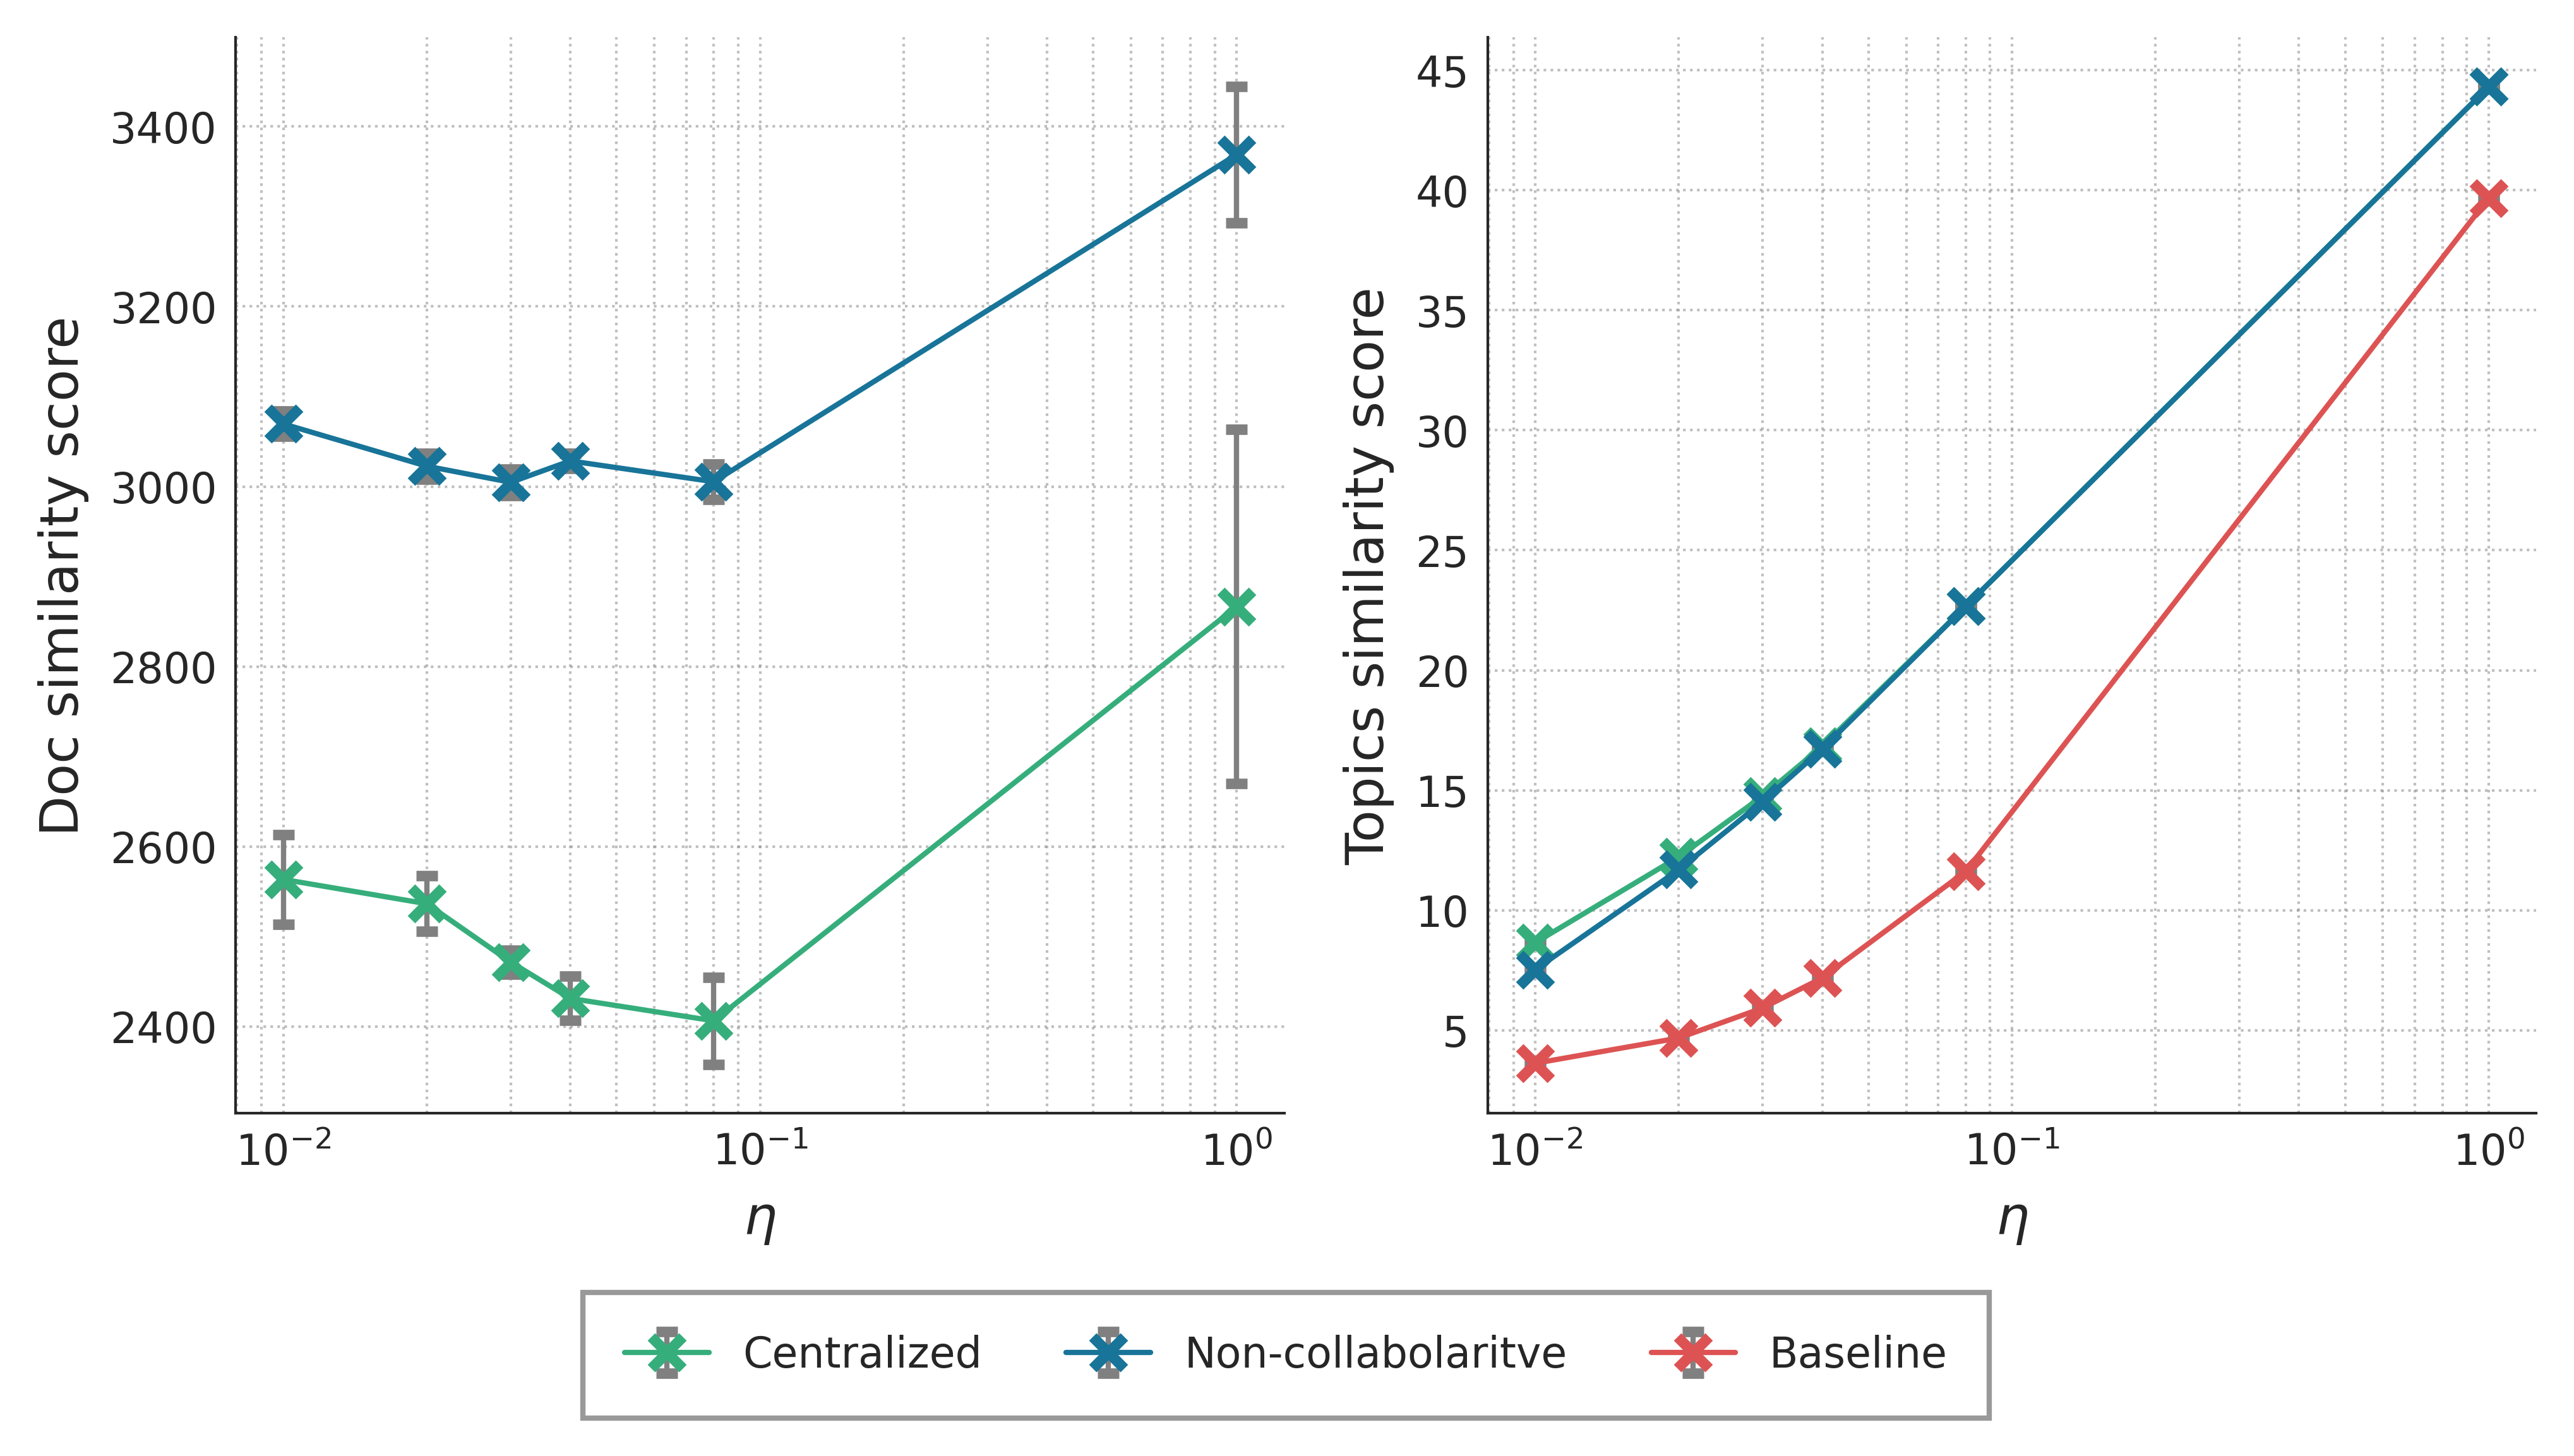

In [178]:
labels = ["Centralized", "Non-collabolaritve", "Baseline"]
colors = ["#36AE7C", "#187498", "#DD5353"]
fig, (ax2, ax1) = plt.subplots(1, 2, sharex=True)
for col_i in range(len(betas_means.columns)):
    ax1.errorbar(betas_means.index,
                 betas_means[betas_means.columns[col_i]],
                 yerr=betas_stds[betas_stds.columns[col_i]],
                 fmt='x-',
                 label=labels[col_i],
                 color=colors[col_i],
                 ecolor='gray',
                 capsize=2,
                 mew=2,
                 capthick=1,
                 lw=1)
ax1.set_xscale('log') # set the x-axis to logarithmic scale
ax1.set_xlabel(r'$\eta$')
ax1.set_ylabel('Topics similarity score')
ax1.grid(True) # add a grid

for col_i in range(len(thetas_means.columns)):
    ax2.errorbar(thetas_means.index,
                 thetas_means[thetas_means.columns[col_i]],
                 yerr=thetas_stds[thetas_stds.columns[col_i]],
                 fmt='x-',
                 label=labels[col_i],
                 color=colors[col_i],
                 ecolor='gray',
                 capsize=2,
                 mew=2,
                 capthick=1,
                 lw=1)
ax2.set_xlabel(r'$\eta$')
ax2.set_ylabel('Doc similarity score')
ax2.grid(True) # add a grid

# Add the legend outside the figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=True, borderpad=1, labelspacing=1)
for ax in (ax1, ax2):
    ax.grid(True, axis='y')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()